<a href="https://colab.research.google.com/github/Trailblazer254/Official/blob/main/Multiple_linear_Regression_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm





In [ ]:
#loading california a Housing  dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)
df['price'] = california.target


In [ ]:
#Displaying first rows
print("Datasets preview:")
print(df.head())

Datasets preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
#check for the missing valuses
print("\nMissing values check:")
print(df.isnull().sum())



Missing values check:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


In [ ]:
#summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

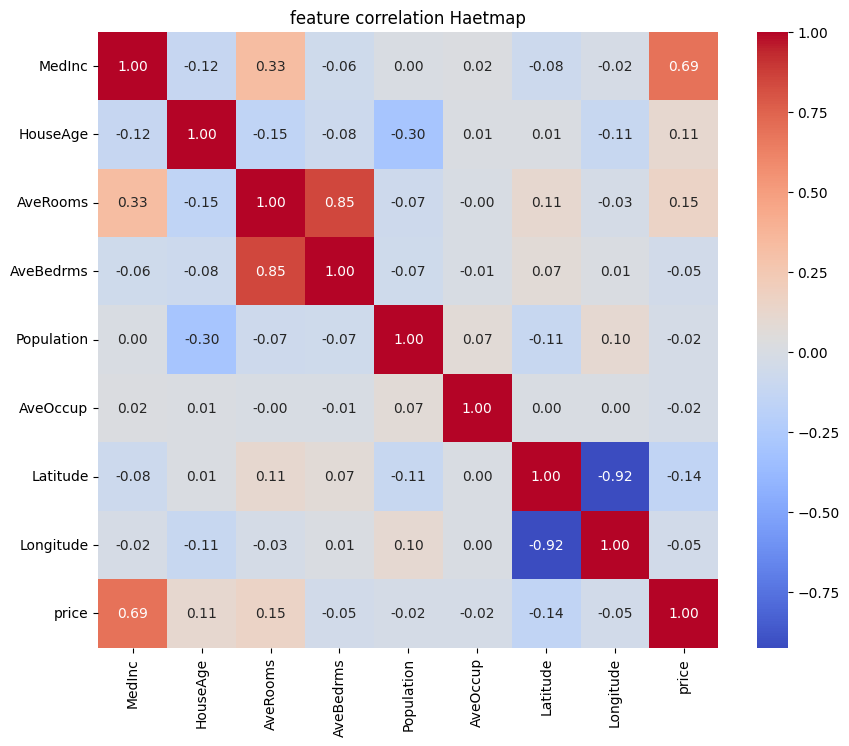

In [ ]:
#corelation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm' ,fmt=".2f")
plt.title("feature correlation Haetmap")
plt.show()


In [ ]:

# Split dataset into features (X) and target (y)
X = df.drop("price", axis=1)  # Independent variables
y = df["price"]               # Dependent variable


In [ ]:
# Train -test split(80% training ,20% testing)
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:


#  Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)




LinearRegression()

In [ ]:
[ ]# predictions
y_pred = model.predict(X_test_scaled)


In [ ]:
print(y_pred)



[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


In [ ]:
#model evaluation
r2= r2_score(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)


In [ ]:
#AIC BIC Calculation (using statsmodel) ARE  essential tools in multiple linear regression for selecting the best model
X_train_const = sm.add_constant(X_train_scaled) # add intercept
ols_model = sm.OLS(y_train, X_train_const).fit()
aic=ols_model.aic
bic=ols_model.bic





In [ ]:
# print performance metrics
print("n\ model Evaluation Metrics :")
print(f"R-squared: (R^2):{r2:.4f}")
print(f"Mean Absolute Error (MAE):{mae:.4f}")
print(f"Mean Squared Error (MSE):{mse:.4f}")
print(f"Root Mean Squared Error (RMSE):{rmse:.4f}")
print(f"Akaike information criterion (AIC):{aic:.4f}")
print(f"Bayesian information criterion (BIC):{bic:.4f}")



n\ model Evaluation Metrics :
R-squared: (R^2):0.5758
Mean Absolute Error (MAE):0.5332
Mean Squared Error (MSE):0.5559
Root Mean Squared Error (RMSE):0.7456
Akaike information criterion (AIC):36013.6303
Bayesian information criterion (BIC):36083.0369


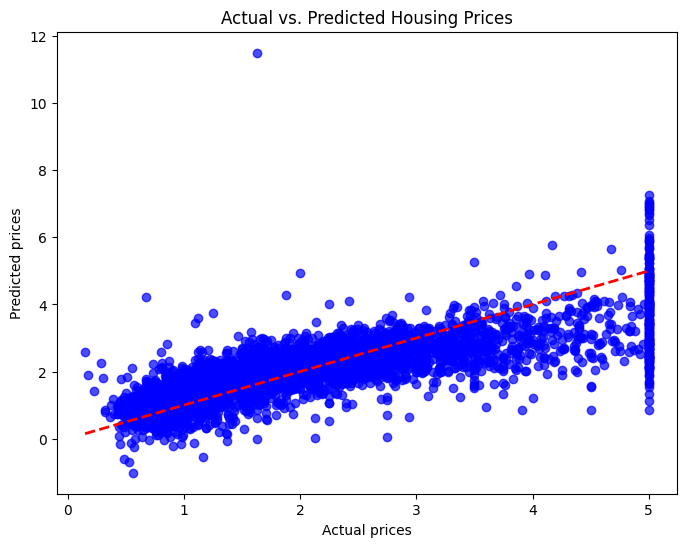

In [ ]:
#plot actual VS predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7,color="blue")
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs. Predicted Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.show()



In [ ]:
#Actual VS predicted Prices
#..... New feature : User Input prediction
print("\n Enter Features values to predict house  price:")
#prompt the user to enter all features
user_input = []
for feature in X.columns:
    value = float(input(f" Enter value for {feature}: "))
    user_input.append(value)
#convert  user input into numpy array and scale
user_input_array =np.array(user_input ).reshap(1,-1)
user_input_scaled=scaler.transform(user_input_array)
#predict house price
predicted_price=model.predict(user_input_scaled)
print(f"\n predicted House price :$ {predicted_price[0]:,.2f}")




 Enter Features values to predict house  price:
